In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.
In this notebook, you will load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

<AxesSubplot:title={'center':'CAD-PHY Exchange Rates'}, xlabel='Date', ylabel='Price ($)'>

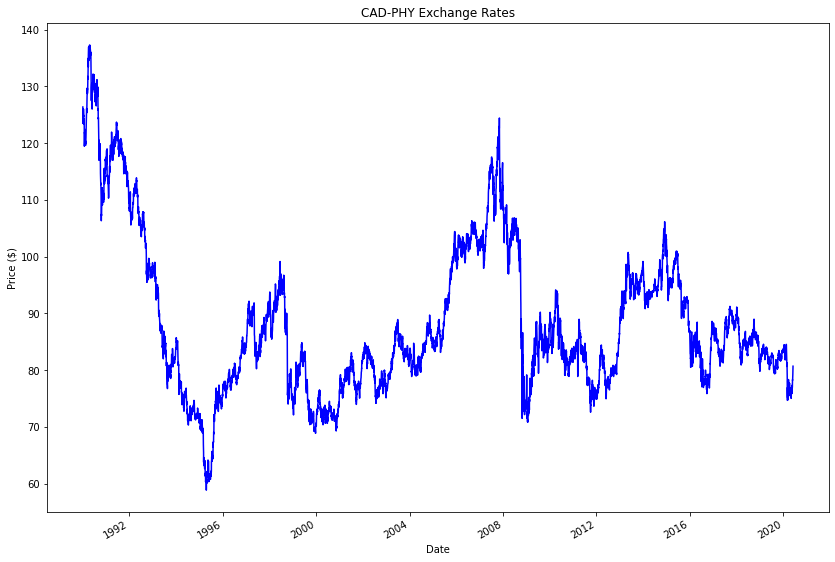

In [42]:
# Plot just the "Price" column from the dataframe:
# YOUR CODE HERE!

cad_jpy_df['Price'].plot(figsize=(14,10),color='blue',ylabel='Price ($)', title='CAD-PHY Exchange Rates')

**Question:** Do you see any patterns, long-term and/or short? 

**Answer:** High volatility in price action both short and long term, with huge dips in 1995 and 2008 which indicate periods of global financial crises. This data shows a descending pattern, therefore indicating a bearish position for the Canadian currency. Exchaange rate has changed from 138 to 80 in 28 years, which is a decrease in total value of 42.1%, showing a strong trend of decreasing value of the Canadian currency relative to the Yen.

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the exchange rate price into trend and noise.

In [5]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
# YOUR CODE HERE!

price_noise, price_trend = sm.tsa.filters.hpfilter(cad_jpy_df["Price"])

In [6]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!

df_price = cad_jpy_df['Price'].to_frame()
df_price['price_noise'] = price_noise
df_price['price_trend'] = price_trend
df_price.tail()

,Price,price_noise,price_trend
Date,,,
2020-05-29,78.29,-0.503961,78.793961
2020-06-01,79.27,0.218939,79.051061
2020-06-02,80.40,1.088117,79.311883
2020-06-03,80.70,1.125501,79.574499
2020-06-04,80.71,0.872339,79.837661


<AxesSubplot:title={'center':'Canadian Dollar-Yen exchange rate'}, xlabel='Date', ylabel='Price ($)'>

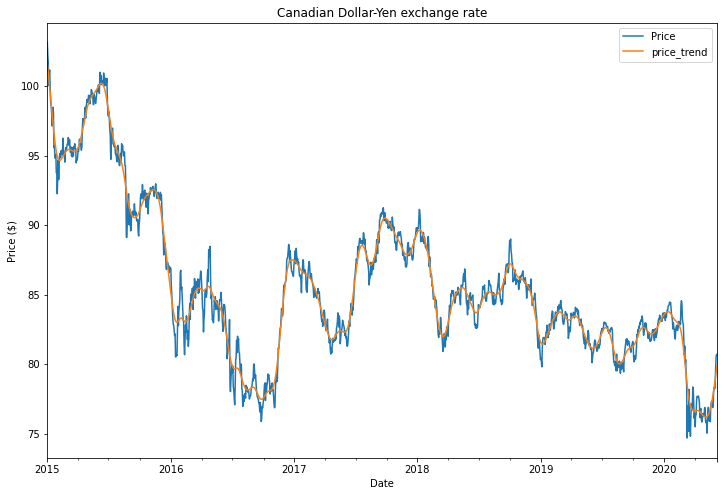

In [7]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!

df_price_2015_present = df_price.loc['2015':'2021']
df_price_2015_present.plot(figsize=(12,8),y=['Price','price_trend'],ylabel='Price ($)',title='Canadian Dollar-Yen exchange rate')

**Question:** Do you see any patterns, long-term and/or short?

**Answer:** The Canadian Dollar-Yen exchange rate is in a downward trend, slowly decreasing over time with slight corrections to the upside but followed by further drops in price.

<AxesSubplot:title={'center':'Price Noise (Volatility) of Returns'}, xlabel='Date', ylabel='%'>

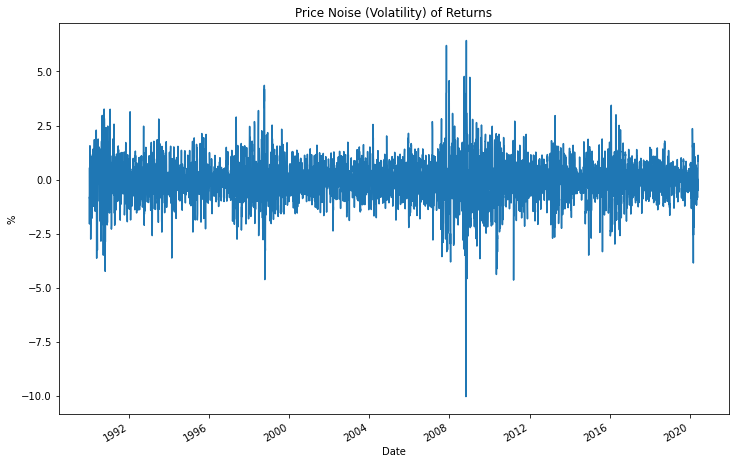

In [50]:
# Plot the Settle Noise
# YOUR CODE HERE!

df_price['price_noise'].plot(figsize=(12,8),title='Price Noise (Volatility) of Returns',ylabel='%')

---

# Forecasting Returns using an ARMA Model

Using exchange rate *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [9]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [10]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!

model = ARMA(returns.Price.values, order=(2,1))

# Fit the model and assign it to a variable called results
# YOUR CODE HERE!

result = model.fit()


In [11]:
# Output model summary results:
# YOUR CODE HERE!

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                     ARMA(2, 1)   Log Likelihood               -9751.978
Method:                       css-mle   S.D. of innovations              0.828
Date:                Wed, 02 Mar 2022   AIC                          19513.955
Time:                        12:11:29   BIC                          19548.846
Sample:                             0   HQIC                         19525.903
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.009     -0.245      0.807      -0.020       0.016
ar.L1.y       -0.8547      0.164     -5.201      0.000      -1.177      -0.533
ar.L2.y       -0.0197      0.013     -1.475      0.140      -0.046       0.006
ma.L1.y        0.8246      0.164      5.031      0.000       0.503       1.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2033           +0.0000j            1.2033            0.5000
AR.2          -42.1697           +0.0000j           42.1697            0.5000
MA.1           -1.2127           +0.0000j            1.2127            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Return Forecast'}>

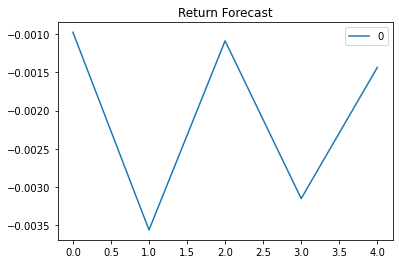

In [12]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!

pd.DataFrame(result.forecast(steps=5)[0]).plot(title="Return Forecast")


**Question:** Based on the p-value, is the model a good fit?

**Answer:** This model shows the voltility of the returns in a linear spiked fashion and therefore is a good fit.

---

# Forecasting the Exchange Rate Price using an ARIMA Model

 1. Using the *raw* CAD/JPY exchange rate price, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Plot a 5 day forecast for the Exchange Rate Price. What does the model forecast predict will happen to the Japanese Yen in the near term?

In [43]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!

model = ARIMA(cad_jpy_df.Price.values, order=(5, 1, 1))

# Fit the model
# YOUR CODE HERE!
result = model.fit()

In [44]:
# Output model summary results:
# YOUR CODE HERE!
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.622
Method:                       css-mle   S.D. of innovations              0.729
Date:                Wed, 02 Mar 2022   AIC                          17507.244
Time:                        16:04:16   BIC                          17563.070
Sample:                             1   HQIC                         17526.361
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0058      0.008     -0.743      0.458      -0.021       0.009
ar.L1.D.y      0.4287      0.246      1.740      0.082      -0.054       0.912
ar.L2.D.y      0.0177      0.014      1.264      0.206      -0.010       0.045
ar.L3.D.y     -0.0118      0.012     -0.959      0.337      -0.036       0.012
ar.L4.D.y      0.0110      0.012      0.879      0.379      -0.013       0.035
ar.L5.D.y     -0.0191      0.011     -1.702      0.089      -0.041       0.003
ma.L1.D.y     -0.4568      0.246     -1.856      0.064      -0.939       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7660           -0.7702j            1.9266           -0.0655
AR.2            1.7660           +0.7702j            1.9266            0.0655
AR.3           -2.3649           -0.0000j            2.3649           -0.5000
AR.4           -0.2974           -2.4212j            2.4394           -0.2695
AR.5           -0.2974           +2.4212j            2.4394            0.2695
MA.1            2.1892           +0.0000j            2.1892            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day CAD/YEN Price Forecast'}, ylabel='Price ($)'>

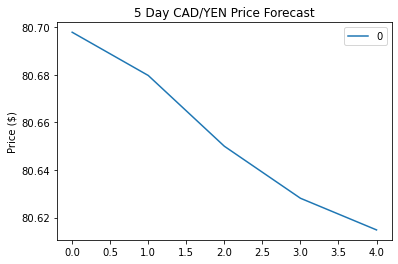

In [57]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!

pd.DataFrame(result.forecast(steps=5)[0]).plot(title="5 Day CAD/YEN Price Forecast",ylabel='Price ($)')

**Question:** What does the model forecast will happen to the Japanese Yen in the near term?

**Answer:** The model forcasts that the price of Yen will increase in the near term.

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen exchange rate returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using exchange rate *Returns*, estimate a GARCH model. **Hint:** You can reuse the `returns` variable from the ARMA model section.

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [16]:
import arch as arch
from arch import arch_model

In [30]:
# Estimate a GARCH model:
# YOUR CODE HERE!

model = arch_model(returns.Price,p=2, q=1)

In [33]:
# Fit the model
# YOUR CODE HERE!

results = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 83967.15660803435
Iteration:      2,   Func. Count:     18,   Neg. LLF: 46800.089672068425
Iteration:      3,   Func. Count:     28,   Neg. LLF: 620567642.8938148
Iteration:      4,   Func. Count:     35,   Neg. LLF: 4505781788.871186
Iteration:      5,   Func. Count:     43,   Neg. LLF: 8952.247178079739
Iteration:      6,   Func. Count:     50,   Neg. LLF: 10961.20965256629
Iteration:      7,   Func. Count:     57,   Neg. LLF: 8975.498103870486
Iteration:      8,   Func. Count:     65,   Neg. LLF: 8910.931931210092
Iteration:      9,   Func. Count:     71,   Neg. LLF: 8926.789304986882
Iteration:     10,   Func. Count:     78,   Neg. LLF: 8912.468506111007
Iteration:     11,   Func. Count:     85,   Neg. LLF: 8910.284913834232
Iteration:     12,   Func. Count:     91,   Neg. LLF: 8910.284859671134
Iteration:     13,   Func. Count:     97,   Neg. LLF: 8910.284859051797
Optimization terminated successfully    (Exit mode 0)
         

In [32]:
# Summarize the model results
# YOUR CODE HERE!
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8910.28
Distribution:                  Normal   AIC:                           17830.6
Method:            Maximum Likelihood   BIC:                           17865.5
                                        No. Observations:                 7928
Date:                Wed, Mar 02 2022   Df Residuals:                     7927
Time:                        12:17:32   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.3175e-03  7.879e-03      1.183      0.237 [-6.125e-03,2.476e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.1837e-03  2.579e-03      3.560  3.702e-04  [4.128e-03,1.424e-02]
alpha[1]       0.0629  1.853e-02      3.397  6.821e-04  [2.662e-02,9.927e-02]
alpha[2]   6.8740e-12  2.024e-02  3.396e-10      1.000 [-3.967e-02,3.967e-02]
beta[1]        0.9236  1.249e-02     73.934      0.000      [  0.899,  0.948]
=============================================================================

Covariance estimator: robust
"""

**Note:** Our p-values for GARCH and volatility forecasts tend to be much lower than our ARMA/ARIMA return and price forecasts. In particular, here we have all p-values of less than 0.05, except for alpha(2), indicating overall a much better model performance. In practice, in financial markets, it's easier to forecast volatility than it is to forecast returns or prices. (After all, if we could very easily predict returns, we'd all be rich!)

In [51]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [52]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
# YOUR CODE HERE!

forecasts = results.forecast(start=returns.index.max(), horizon=forecast_horizon)

In [53]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.512046,12.520662,12.529157,12.537532,12.545789


In [54]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.512046
h.2,12.520662
h.3,12.529157
h.4,12.537532
h.5,12.545789


<AxesSubplot:title={'center':'5 Day Exchange Rate Forecast of Volatility'}, ylabel='Volatility'>

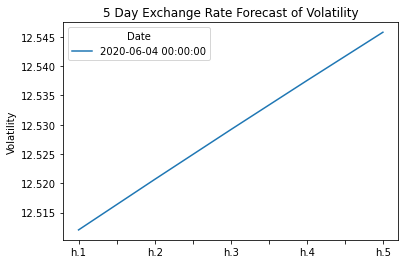

In [58]:
# Plot the final forecast
# YOUR CODE HERE!

final.plot(title="5 Day Exchange Rate Forecast of Volatility",ylabel='Volatility')

**Question:** What does the model forecast will happen to volatility in the near term?

**Answer:** The model forcast shows us the Yen will continue to increase in value and experience volatility.

---

# Conclusions

1. Based on your time series analysis, would you buy the yen now?

    1. The time series analysis shows the Yen will increase in value over time, therefore it is a good time to buy now.

2. Is the risk of the yen expected to increase or decrease?
    2. The risk of yen is expected to decrease due to its strength and stability, as compared to the Canadian dollar.

3. Based on the model evaluation, would you feel confident in using these models for trading?
    3. Yes, these models make it clear on potential directions of price of an asset and therefore would be good in making profitable trades in the market.